In [1]:
import pandas as pd
import plotly.express as px

# Read the CSV file using the custom date parser for the date columns
df = pd.read_csv('city_temperature.csv',dtype=str)

# conver temperature to 摄氏度 并且去除异常值
df['AvgTemperature'] = df['AvgTemperature'].astype(float)
df = df[df.AvgTemperature > -100]
df['AvgTemperature'] = (df['AvgTemperature'] - 32) / 1.8
df['AvgTemperature'] = df['AvgTemperature'].round(2)
# select past 2000 to 2020 years
df = df[df.Year >= '2000']
df.head()
# save to csv
df.to_csv('city_temperature_2000_2020.csv',index=False)

In [4]:
df.tail()


,Region,Country,State,City,Month,Day,Year,AvgTemperature
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,28.00
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,27.56
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,29.00
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,28.78
2906326,North America,US,Additional Territories,San Juan Puerto Rico,7,31,2013,28.67


# Australia Average Temperature

In [48]:
# 首先筛选出澳大利亚的数据
df_aus = df[df['Country'] == 'Australia']
# 澳大利亚城市的经纬度坐标
cities_coordinates = {
    "Brisbane": {"lat": -27.4698, "lon": 153.0251},
    "Canberra": {"lat": -35.2809, "lon": 149.1300},
    "Melbourne": {"lat": -37.8136, "lon": 144.9631},
    "Perth": {"lat": -31.9505, "lon": 115.8605},
    "Sydney": {"lat": -33.8688, "lon": 151.2093}
}
from plotly.subplots import make_subplots
import plotly.graph_objs as go


# convert temperature 现在是华氏度，需要转换成摄氏度
df_aus['AvgTemperature'] = (df_aus['AvgTemperature'].astype(float) - 32) * 5 / 9
# drop out outliers
df_aus = df_aus[df_aus['AvgTemperature'] > -10]

# 将这些坐标添加到 df_aus 数据集中
for city, coords in cities_coordinates.items():
    df_aus.loc[df_aus['City'] == city, 'Latitude'] = coords['lat']
    df_aus.loc[df_aus['City'] == city, 'Longitude'] = coords['lon']

# 计算每个城市每年的平均气温
df_aus_grouped = df_aus.groupby(['City', 'Year', 'Latitude', 'Longitude']).agg({'AvgTemperature': 'mean'}).reset_index()

# 城市列表
cities = df_aus_grouped['City'].unique()


# 创建一个图形对象
fig = go.Figure()

# 城市列表
cities = df_aus_grouped['City'].unique()

# 为每个城市添加一个折线图到图表中
for city in cities:
    df_city = df_aus_grouped[df_aus_grouped['City'] == city]
    fig.add_trace(
        go.Scatter(x=df_city['Year'], y=df_city['AvgTemperature'], mode='lines', name=city)
    )

# 更新布局
fig.update_layout(
    title="Yearly Average Temperature in Australian Cities",
    xaxis_title="Year",
    yaxis_title="Average Temperature",
    legend_title="City",
    height=600
)
# 显示图表
fig.show()

# save to csv
df_aus_grouped.to_csv('aus_temp.csv',index=False)

/var/folders/z8/zm1gct552gb8700n_kq3pm9h0000gn/T/ipykernel_89955/1294716942.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots
cities_coordinates = {
    "Brisbane": {"lat": -27.4698, "lon": 153.0251},
    "Canberra": {"lat": -35.2809, "lon": 149.1300},
    "Melbourne": {"lat": -37.8136, "lon": 144.9631},
    "Perth": {"lat": -31.9505, "lon": 115.8605},
    "Sydney": {"lat": -33.8688, "lon": 151.2093}
}


# 城市列表
cities = df_aus['City'].unique()

# 创建一个包含多个子图的图表
fig = make_subplots(rows=len(cities), cols=1, shared_xaxes=True, vertical_spacing=0.02)

# 为每个城市添加数据到相应的子图
for i, city in enumerate(cities, start=1):
    df_city = df_aus[df_aus['City'] == city]
    fig.add_trace(
        go.Scatter(x=df_city['Year'], y=df_city['AvgTemperature'], mode='lines+markers', name=city),
        row=i, col=1
    )

# 更新布局
fig.update_layout(height=300 * len(cities), title_text='Yearly Average Temperature in Australian Cities')
fig.show()

# save to txt
df_aus.to_csv('2df_aus.csv',index=False)
df_aus_grouped.to_csv('2df_aus_grouped.csv',index=False)


In [56]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
# 澳大利亚城市的经纬度坐标
cities_coordinates = {
    "Brisbane": {"lat": -27.4698, "lon": 153.0251},
    "Canberra": {"lat": -35.2809, "lon": 149.1300},
    "Melbourne": {"lat": -37.8136, "lon": 144.9631},
    "Perth": {"lat": -31.9505, "lon": 115.8605},
    "Sydney": {"lat": -33.8688, "lon": 151.2093}
}


# 计算每个城市过去20年的平均气温
city_avg_temps = df_aus.groupby('City')['AvgTemperature'].mean().reset_index()

# 澳大利亚城市的经纬度坐标
cities_coordinates = {
    "Brisbane": {"lat": -27.4698, "lon": 153.0251},
    "Canberra": {"lat": -35.2809, "lon": 149.1300},
    "Melbourne": {"lat": -37.8136, "lon": 144.9631},
    "Perth": {"lat": -31.9505, "lon": 115.8605},
    "Sydney": {"lat": -33.8688, "lon": 151.2093}
}

# 添加经纬度到数据集
city_avg_temps['lat'] = city_avg_temps['City'].map(lambda x: cities_coordinates[x]['lat'])
city_avg_temps['lon'] = city_avg_temps['City'].map(lambda x: cities_coordinates[x]['lon'])

# 创建地图
fig = px.scatter_geo(city_avg_temps,
                     lat='lat',
                     lon='lon',
                     color='AvgTemperature',  # 颜色表示平均气温
                     hover_name='City',      # 鼠标悬停时显示城市名
                     #size='AvgTemperature',  # 大小表示平均气温
                     projection="natural earth",
                     title="20-Year Average Temperature in Australian Cities",
                     center={"lat": -33.8688, "lon": 151.2093},  # 将视图中心设置为悉尼的坐标
                       # 设置最大气泡大小
                     )  # 设置初始缩放级别

fig.update_layout(height=600, width=800)
fig.show()
# save data to txt 
df_aus.to_csv('df_aus.csv',index=False)
df_aus_grouped.to_csv('df_aus_grouped.csv',index=False)


# Sydney Average Temperature

/var/folders/z8/zm1gct552gb8700n_kq3pm9h0000gn/T/ipykernel_89955/205349824.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



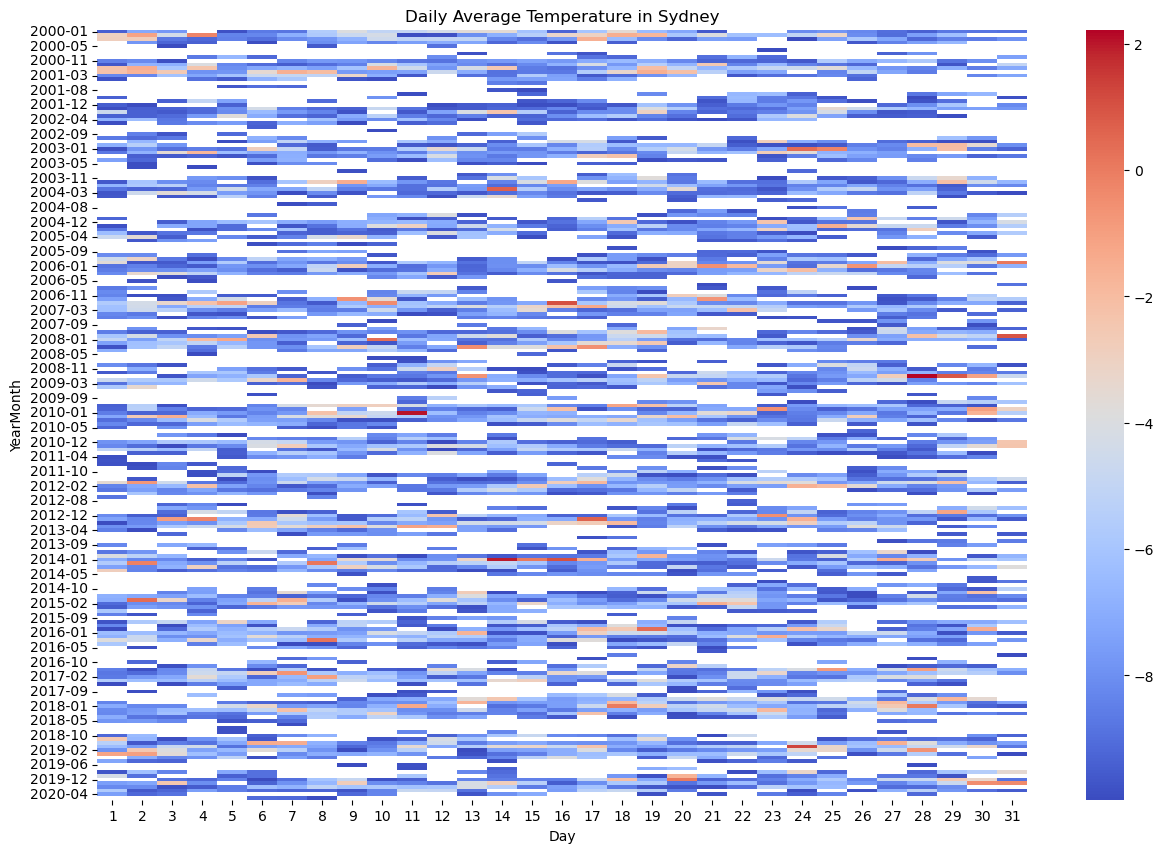

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_sydney = df[(df['City'] == 'Sydney') & (df['Country'] == 'Australia')]
# 转为摄氏度
df_sydney['AvgTemperature'] = (df_sydney['AvgTemperature'].astype(float) - 32) * 5 / 9
# 祛除异常
df_sydney = df_sydney[df_sydney['AvgTemperature'] > -10]

# 确保年、月、日都是整数类型
df_sydney['Year'] = df_sydney['Year'].astype(int)
df_sydney['Month'] = df_sydney['Month'].astype(int)
df_sydney['Day'] = df_sydney['Day'].astype(int)

# 创建一个新列，表示年份和月份的组合
df_sydney['YearMonth'] = df_sydney['Year'].astype(str) + '-' + df_sydney['Month'].astype(str).str.zfill(2)

# 创建透视表
pivot = df_sydney.pivot_table(index='YearMonth', columns='Day', values='AvgTemperature', aggfunc='mean')

# 创建热力图
plt.figure(figsize=(15, 10))
sns.heatmap(pivot, cmap='coolwarm')
plt.title('Daily Average Temperature in Sydney')
plt.show()

# save to csv
df_sydney.to_csv('heatmap_sydney.csv', index=False)

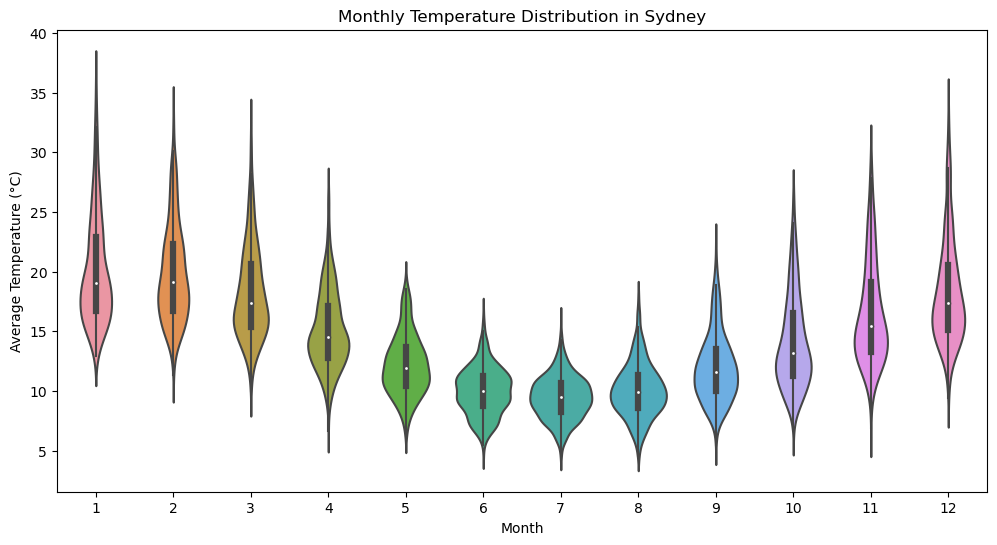

In [44]:
# 确保 Month 和 AvgTemperature 列是适当的数据类型
df_sydney['Month'] = df_sydney['Month'].astype(int)
df_sydney['AvgTemperature'] = df_sydney['AvgTemperature'].astype(float)

# 创建小提琴图
plt.figure(figsize=(12, 6))
sns.violinplot(x="Month", y="AvgTemperature", data=df_sydney)
plt.title('Monthly Temperature Distribution in Sydney')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.show()

# save to csv
df_sydney.to_csv('sydney.csv',index=False)
df_aus.to_csv('aus.csv',index=False)

# Comparing Ausrtalia and China Average Temperature

In [43]:
import pandas as pd
import plotly.graph_objects as go

# 数据筛选
df_china = df[df['Country'] == 'China']
df_australia = df[df['Country'] == 'Australia']

# 计算每年的平均气温
avg_temp_china = df_china.groupby('Year')['AvgTemperature'].mean()
avg_temp_australia = df_australia.groupby('Year')['AvgTemperature'].mean()

# 创建图表
fig = go.Figure()
fig.add_trace(go.Scatter(x=avg_temp_china.index, y=avg_temp_china, mode='lines', name='China'))
fig.add_trace(go.Scatter(x=avg_temp_australia.index, y=avg_temp_australia, mode='lines', name='Australia'))
fig.update_layout(title='Yearly Average Temperature: China vs Australia',
                  xaxis_title='Year',
                  yaxis_title='Average Temperature (°C)')
fig.show()
# save to txt
avg_temp_china.to_csv('avg_temp_china.txt', sep='\t', index=True, header=True)
avg_temp_australia.to_csv('avg_temp_australia.txt', sep='\t', index=True, header=True)


In [42]:
# 计算每月的平均气温
avg_temp_month_china = df_china.groupby('Month')['AvgTemperature'].mean()
avg_temp_month_australia = df_australia.groupby('Month')['AvgTemperature'].mean()

# 创建图表
fig = go.Figure()
fig.add_trace(go.Scatter(x=avg_temp_month_china.index, y=avg_temp_month_china, mode='lines', name='China'))
fig.add_trace(go.Scatter(x=avg_temp_month_australia.index, y=avg_temp_month_australia, mode='lines', name='Australia'))
fig.update_layout(title='Monthly Average Temperature: China vs Australia',
                  xaxis_title='Month',
                  yaxis_title='Average Temperature (°C)')
fig.show()
# save this data to txt
df_china.to_csv('china.csv')
df_australia.to_csv('australia.csv')



# All counteries

In [41]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

# 准备数据
df['AvgTemperature'] = pd.to_numeric(df['AvgTemperature'], errors='coerce')
df.dropna(subset=['AvgTemperature'], inplace=True)

# 计算每个国家每年的平均气温
avg_temp_by_country = df.groupby(['Country', 'Year'])['AvgTemperature'].mean().reset_index()

# 初始化线性回归模型
model = LinearRegression()

# 存储每个国家的趋势
trends = []

# 对每个国家的数据进行线性回归
for country in avg_temp_by_country['Country'].unique():
    country_data = avg_temp_by_country[avg_temp_by_country['Country'] == country]
    if len(country_data) >= 10:  # 只考虑数据量足够的国家
        X = country_data['Year'].values.reshape(-1, 1)
        y = country_data['AvgTemperature'].values
        model.fit(X, y)
        slope = model.coef_[0]
        trends.append((country, slope))

# 将趋势转换为 DataFrame
trend_df = pd.DataFrame(trends, columns=['Country', 'TemperatureTrend'])

# 筛选出变热和变冷的国家
warming_countries = trend_df[trend_df['TemperatureTrend'] > 0].sort_values(by='TemperatureTrend', ascending=False)
cooling_countries = trend_df[trend_df['TemperatureTrend'] < 0].sort_values(by='TemperatureTrend')

# 可视化
fig = go.Figure()
fig.add_trace(go.Bar(x=warming_countries['Country'], y=warming_countries['TemperatureTrend'], name='Warming'))
fig.add_trace(go.Bar(x=cooling_countries['Country'], y=cooling_countries['TemperatureTrend'], name='Cooling'))
fig.update_layout(title='Temperature Trends in Different Countries',
                  xaxis_title='Country',
                  yaxis_title='Temperature Trend (°C per Year)')
fig.show()

# save waming and cooling countries to txt file
warming_countries.to_csv('data/warming_countries.txt',index=False)
cooling_countries.to_csv('data/cooling_countries.txt',index=False)

In [38]:
import plotly.express as px
import numpy as np

df_countries = px.data.gapminder().query("year==2007")
df_trends = trend_df.merge(df_countries[['country', 'iso_alpha', 'continent']], left_on='Country', right_on='country')

# 为了可视化，取趋势的绝对值

df_trends['abs_trend'] = df_trends['TemperatureTrend'].abs()

fig = px.scatter_geo(df_trends,
                     locations="iso_alpha",
                     color="TemperatureTrend",  # 气温趋势决定颜色
                     hover_name="Country",      # 鼠标悬停时显示国家名
                     size="abs_trend",          # 使用趋势的绝对值作为大小
                     projection="natural earth",
                     title="Global Temperature Trends")

# figure size adjustment
fig.update_layout(height=600, width=800)
fig.show()